<a href="https://colab.research.google.com/github/Vaaya1176/Shivaaya_Projects/blob/main/ANN_Heart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None
               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.0

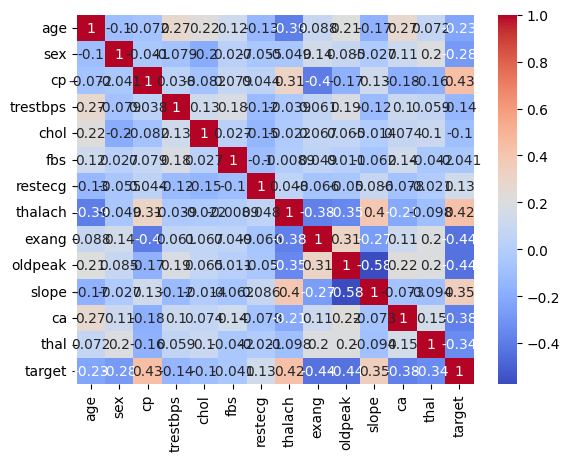

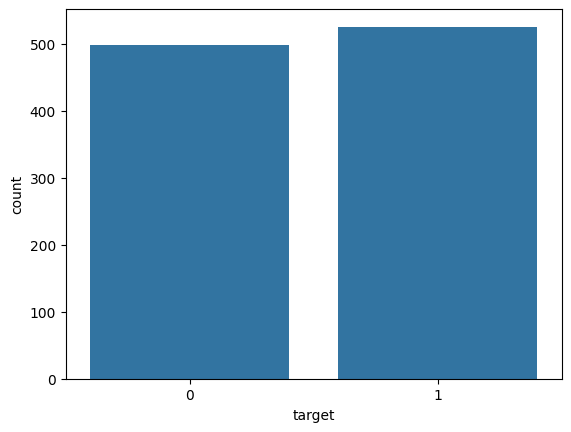

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5625 - loss: 0.6753 - val_accuracy: 0.7610 - val_loss: 0.5735
Epoch 2/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7282 - loss: 0.5491 - val_accuracy: 0.8341 - val_loss: 0.4562
Epoch 3/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7900 - loss: 0.4519 - val_accuracy: 0.8634 - val_loss: 0.3923
Epoch 4/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8378 - loss: 0.4099 - val_accuracy: 0.8537 - val_loss: 0.3574
Epoch 5/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8347 - loss: 0.3942 - val_accuracy: 0.8683 - val_loss: 0.3365
Epoch 6/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8440 - loss: 0.3635 - val_accuracy: 0.8585 - val_loss: 0.3228
Epoch 7/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8319 - loss: 0.3644 - val_accuracy: 0.8537 - val_loss: 0.3126
Epoch 8/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8701 - loss: 0.2993 - val_accuracy: 0.8732 - val_loss: 0.2

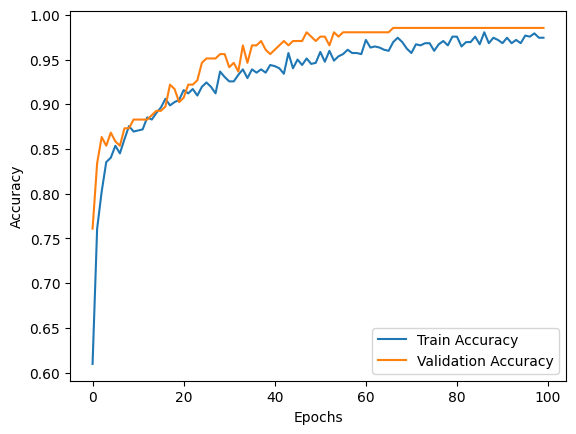

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
Accuracy: 0.9853658536585366
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       100
           1       0.97      1.00      0.99       105

    accuracy                           0.99       205
   macro avg       0.99      0.98      0.99       205
weighted avg       0.99      0.99      0.99       205



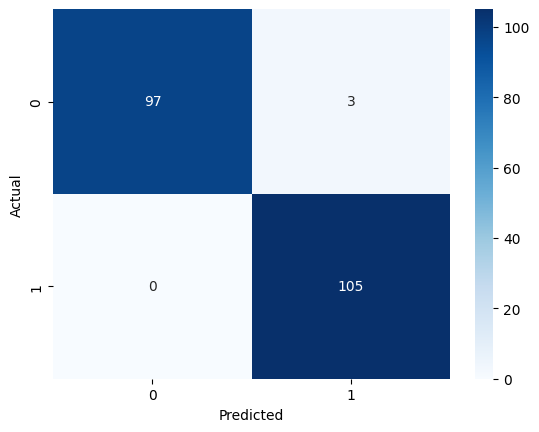

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Loading the dataset
df = pd.read_csv("/content/heart (4).csv")

# Data Exploration
print(df.info())
print(df.describe())
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

# Checking target distribution
sns.countplot(x=df['target'])
plt.show()

# Feature Selection & Preprocessing
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
continuous_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# One-Hot Encoding for categorical variables
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Splitting data
X = df.drop(columns=['target'])
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scaling continuous features
scaler = StandardScaler()
X_train[continuous_cols] = scaler.fit_transform(X_train[continuous_cols])
X_test[continuous_cols] = scaler.transform(X_test[continuous_cols])

# Building ANN Model
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

# Compiling Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training the Model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=16, verbose=1)

# Plotting Training History
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Model Evaluation
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
